# Evolución de los discos de hielo
## Ajuste de curva según las isócronas de Davies y otros (2020) (M1)


In [1]:
import pandas as pd #visualizar y trabajar con datos
import os #acceder a funcionalidades dependientes del Sistema Operativo\
import numpy as np
import matplotlib.pyplot as plt #visualizar datos (graficos, mapas...)
%matplotlib inline
import math #utiluzar fórmulas matemáticas (raiz, pi...)

#### Interpolación de radios cada 100 años y calculo de espesor (h)



Radios del volcán CVMCh:
    volcan  tiempo   edad         Rt        ht            At            Vt
0    CVMCh   35000      0   2.192368  0.087689     15.100000      1.324105
1    CVMCh   34900    100   3.475254  0.122179     37.942239      4.635762
2    CVMCh   34800    200   4.758139  0.153194     71.125315     10.895994
3    CVMCh   34700    300   4.773899  0.153559     71.597236     10.994433
4    CVMCh   34600    400   4.789658  0.153924     72.070717     11.093433
..     ...     ...    ...        ...       ...           ...           ...
346  CVMCh     400  34600  58.466896  0.932531  10739.151160  10014.587816
347  CVMCh     300  34700  58.465081  0.932510  10738.484281  10013.742062
348  CVMCh     200  34800  58.463266  0.932489  10737.817423  10012.896354
349  CVMCh     100  34900  58.461450  0.932468  10737.150586  10012.050690
350  CVMCh       0  35000  58.459635  0.932447  10736.483769  10011.205072

[351 rows x 7 columns]

Radios del volcán VH:
    volcan  tiempo   edad   

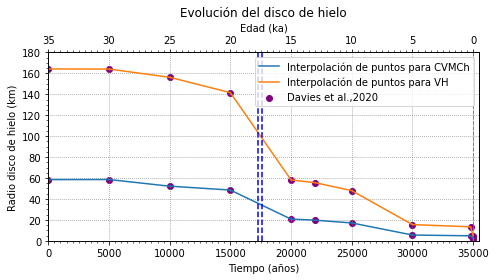

In [19]:
#### Interpolación de radios cada 100 años y calculo de espesor (h),

Tabla_CVMCh = pd.read_excel("Input//Tabla_radiosfinal_CVMCh.xlsx")
Tabla_VH = pd.read_excel("Input//Tabla_radiosfinal_VH.xlsx")
Tablas = [Tabla_CVMCh,Tabla_VH]

vn = ["CVMCh", "VH"]

r_interpol= []
for i in range(len(Tablas)):
    volcan = Tablas[i]["volcan"]
    x_edad = Tablas[i]["edad"]
    y_radio = Tablas[i]["Radio (km)"]
    edad_intervalo_tiempo = np.arange(0,35100,100)
    r_cada100 = list(np.interp( edad_intervalo_tiempo, x_edad, y_radio ))
    sorted (r_cada100)
    superficie = [(r**2)*math.pi for r in r_cada100]
 
    k = 0.033 #constante usada en ecuación
    y = 1.36 #valor definido para ice field y glaciares (DAVIES ET AL., 2020)

    h =  [k * (A)**(y-1) for A in superficie]
    volumen = [ h[a]*superficie[a] for a in range(len(h))]

    data = {"volcan": volcan[i], "tiempo": edad_intervalo_tiempo[::-1], "edad": edad_intervalo_tiempo, "Rt": r_cada100,
            "ht": h, "At": superficie, "Vt": volumen}
    tabla_interpolada = pd.DataFrame(data)
    r_interpol.append(tabla_interpolada)

# Imprimir los resultados
print("Radios del volcán CVMCh:")
print(r_interpol[0])
print("\nRadios del volcán VH:")
print(r_interpol[1])    

def save_excel_file(df, filename):
    if os.path.isfile(filename):
        print(f"El archivo '{filename}' ya existe aquí")
    else:
        df.to_excel(filename)
        print(f"El archivo '{filename}' se ha guardado")

# Guardar el archivo para CVMCh
filename_cvmch = "Output/interpolx100_CVMCh.xlsx"
save_excel_file(r_interpol[0], filename_cvmch)

# Guardar el archivo para VH
filename_vh = "Output/interpolx100_VH.xlsx"
save_excel_file(r_interpol[1], filename_vh)

#####################################################################################################################
###################################################################################################################
###GRAFICAR
fig, ax1 = plt.subplots(figsize=(7, 4))

x_cm= r_interpol[0]['tiempo']
y_cm= r_interpol[0]['Rt']
x_vh= r_interpol[1]['tiempo']
y_vh= r_interpol[1]['Rt']

t_cvmch_D =Tabla_CVMCh['tiempo']
r_cvmch_D = Tabla_CVMCh['Radio (km)']


t_vh_D =Tabla_VH['tiempo']
r_vh_D = Tabla_VH['Radio (km)']

ax1.plot(x_cm,y_cm,label='Interpolación de puntos para CVMCh')
ax1.plot(x_vh,y_vh,label='Interpolación de puntos para VH')
ax1.scatter(t_cvmch_D, r_cvmch_D, color="purple", label="Davies et al.,2020")
ax1.scatter(t_vh_D, r_vh_D, color="purple")
ax1.set_ylim(0, 180)
ax1.set_xlim(0, 35500)
ax1.axvline(x=(35000-17700), color='b', linestyle='--')
ax1.axvline(x=(35000-17400), color='b', linestyle='--')

ax1.set_title("Evolución del disco de hielo")

#a = [35000, 34800, 30000, 25000, 22000, 20000, 15000, 10000, 5000, 0]
ax2 = ax1.twiny()
ax2.invert_xaxis()
ax2.set_xlim(35.0, -0.5)

ax1.axvline(x=35000, color="grey", linestyle="--", linewidth=1)
ax1.set_xlabel("Tiempo (años)", labelpad=5, fontsize=10)
ax2.set_xlabel("Edad (ka)", labelpad=5, fontsize=10)
ax1.set_ylabel("Radio disco de hielo (km)", labelpad=5, fontsize=10)
ax1.grid(linewidth=0.75, color='grey', linestyle='dotted')

xmajor_tick = np.arange(0, 35500, 5000)
xminor_tick = np.arange(0, 35200, 500)
ax1.set_xticks(xmajor_tick)
ax1.set_xticks(xminor_tick, minor=True)

ymajor_tick = np.arange(0, 181, 20)
yminor_tick = np.arange(0, 180, 5)
ax1.set_yticks(ymajor_tick)
ax1.set_yticks(yminor_tick, minor=True)

xmajor_tick = np.arange(0, 35.500, 5.000)
xminor_tick = np.arange(0, 35.200, .500)
ax2.set_xticks(xmajor_tick)
ax2.set_xticks(xminor_tick, minor=True)



ax1.legend(loc='upper right')
fig.tight_layout()

# Ajuste de curva según las isócronas de Davies y otros (2020) (M1)

***********************************
RESULTADOS CVMCh
radio maximo ciclo 1: 58.55040321178965
radio maximo ciclo 2: 49.216766373338
radio maximo ciclo 3: 20.227292514590168
radio maximo ciclo 4: 5.19939644354738
A = 29.275201605894825
B es correcto
***********************************
RESULTADOS VH
radio maximo ciclo 1: 164.1755061983342
radio maximo ciclo 2: 144.47717749872155
radio maximo ciclo 3: 58.14337146872175
radio maximo ciclo 4: 14.6017597060451
B es correcto 
El archivo 'Output/M1_CVMCh.xlsx' se ha guardado
El archivo 'Output/M1_VH.xlsx' se ha guardado


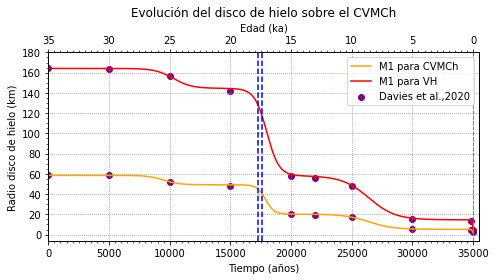

In [22]:
file_cvmch,file_vh = r_interpol[0],r_interpol[1]

####FUNCION (MODELO 1)

#####################################
###########  CVMCh ###############
################################
def func_deglaciation(RADIO_MAX, b1, b2, b3, b4, pto_medio_1, w1, pto_medio_2, w2, pto_medio_3, w3, pto_medio_4, w4, x):
    y = RADIO_MAX * (((b1) * (np.tanh((pto_medio_1 - x) / w1))) + (b2 * (np.tanh((pto_medio_2 - x) / w2))) + (b3 * (np.tanh((pto_medio_3 - x) / w3))) + (b4 * (np.tanh((pto_medio_4 - x) / w4)))) + RADIO_MAX
    return y

edad,tiempo_cvmch, radios_cvmch = file_cvmch["edad"], file_cvmch["tiempo"][::-1], file_cvmch["Rt"][::-1]

t_cvmch_D =Tabla_CVMCh['tiempo']
r_cvmch_D = Tabla_CVMCh['Radio (km)']

print("***********************************")
print("RESULTADOS CVMCh")

t_0, t_1, t_2,t_3,t_4= 0,140,210,320,351

ciclo_1_t_cvmch = tiempo_cvmch[t_0:t_1]
ciclo_1_r_cvmch = radios_cvmch[t_0:t_1]

ciclo_2_t_cvmch = tiempo_cvmch[t_1:t_2]
ciclo_2_r_cvmch = radios_cvmch[t_1:t_2]

ciclo_3_t_cvmch = tiempo_cvmch[t_2:t_3]
ciclo_3_r_cvmch = radios_cvmch[t_2:t_3]

ciclo_4_t_cvmch = tiempo_cvmch[t_3:t_4]
ciclo_4_r_cvmch = radios_cvmch[t_3:t_4]

rmax1_cvmch = max(ciclo_1_r_cvmch)
print('radio maximo ciclo 1: ' + str(rmax1_cvmch))
rmax2_cvmch = max(ciclo_2_r_cvmch)
print('radio maximo ciclo 2: ' + str(rmax2_cvmch))
rmax3_cvmch = max(ciclo_3_r_cvmch)
print('radio maximo ciclo 3: ' + str(rmax3_cvmch))
rmax4_cvmch = max(ciclo_4_r_cvmch)
print('radio maximo ciclo 4: ' + str(rmax4_cvmch))

RADIO_MAX_cvmch = rmax1_cvmch / 2
print('A = '+str(RADIO_MAX_cvmch))
b1_cvmch = (rmax1_cvmch - rmax2_cvmch) / rmax1_cvmch
b2_cvmch = (rmax2_cvmch - rmax3_cvmch) / rmax1_cvmch
b3_cvmch = (rmax3_cvmch - rmax4_cvmch) / rmax1_cvmch
b4_cvmch = rmax4_cvmch / rmax1_cvmch

B_cvmch = b1_cvmch + b2_cvmch + b3_cvmch + b4_cvmch
if B_cvmch == 1:
    print('B es correcto')
else:
    print('B = ' + str(B_cvmch))

pto_medio_1_cvmch =9500
pto_medio_2_cvmch =17900
pto_medio_3_cvmch=26400
pto_medio_4_cvmch=34980
w1_cvmch=1300
w2_cvmch=700
w3_cvmch=2010
w4_cvmch=85


###########################################################################################################################

#####################################
###########  V H ###############
################################

edad,tiempo_vh, radios_vh = file_vh["edad"], file_vh["tiempo"][::-1], file_vh["Rt"][::-1]

t_vh_D =Tabla_VH['tiempo']
r_vh_D = Tabla_VH['Radio (km)']

print("***********************************")
print("RESULTADOS VH")

#intervalos de "avance(estabilización) -> retroceso abrupto)"
t_0_vh = 0
t_1_vh = 140
t_2_vh = 200
t_3_vh = 320
t_4_vh = 351

ciclo_1_t_vh = tiempo_vh[t_0_vh:t_1_vh]
ciclo_1_r_vh = radios_vh[t_0_vh:t_1_vh]

ciclo_2_t_vh = tiempo_vh[t_1_vh:t_2_vh]
ciclo_2_r_vh = radios_vh[t_1_vh:t_2_vh]

ciclo_3_t_vh = tiempo_vh[t_2_vh:t_3_vh]
ciclo_3_r_vh = radios_vh[t_2_vh:t_3_vh]

ciclo_4_t_vh = tiempo_vh[t_3_vh:t_4_vh]
ciclo_4_r_vh = radios_vh[t_3_vh:t_4_vh]


rmax1_vh = max(ciclo_1_r_vh)
print('radio maximo ciclo 1: ' + str(rmax1_vh))
rmax2_vh= max(ciclo_2_r_vh)
print('radio maximo ciclo 2: ' + str(rmax2_vh))
rmax3_vh= max(ciclo_3_r_vh)
print('radio maximo ciclo 3: ' + str(rmax3_vh))
rmax4_vh= max(ciclo_4_r_vh)
print('radio maximo ciclo 4: ' + str(rmax4_vh))


##########################################################################################3


RADIO_MAX_vh = rmax1_vh/2

b1_vh = (rmax1_vh-rmax2_vh)/rmax1_vh
b2_vh =(rmax2_vh-rmax3_vh)/rmax1_vh
b3_vh =(rmax3_vh-rmax4_vh)/rmax1_vh
b4_vh =rmax4_vh/rmax1_vh

B_vh= b1_vh+b2_vh+b3_vh+b4_vh
if B_vh == 1:
    print('B es correcto ')
else:
    print('B = ' + str(B_vh))

pto_medio_1_vh = 10300
pto_medio_2_vh = 18000
pto_medio_3_vh = 26400
pto_medio_4_vh = 34980

w1_vh = 1500
w2_vh = 1000
w3_vh = 2200
w4_vh = 85

######################################################################################################################3



xs = np.arange(0, 35100, 100) 

y_mc = func_deglaciation(RADIO_MAX_cvmch, b1_cvmch, b2_cvmch, b3_cvmch, b4_cvmch, pto_medio_1_cvmch, w1_cvmch, pto_medio_2_cvmch,
                         w2_cvmch, pto_medio_3_cvmch, w3_cvmch, pto_medio_4_cvmch, w4_cvmch, x=xs)

y_vh = func_deglaciation(RADIO_MAX_vh, b1_vh,b2_vh,b3_vh,b4_vh, pto_medio_1_vh, w1_vh, pto_medio_2_vh, w2_vh,pto_medio_3_vh,
                         w3_vh,pto_medio_4_vh,w4_vh,x=xs)

superficies_mc = []
for r in y_mc:
    superficie = (r**2) * math.pi
    superficies_mc.append(superficie)
    
superficies_vh = []
for r in y_vh:
    superficie = (r**2) * math.pi
    superficies_vh.append(superficie)
    
k = 0.033 #constante usada en ecuación 
y = 1.36 #valor definido para ice field y glaciares (DAVIES ET AL., 2020)
    
h_mc = [k * (A)**(y-1) for A in superficies_mc]
h_vh = [k * (A)**(y-1) for A in superficies_vh]  

volumen_mc = [h_mc[a] * superficies_mc[a] for a in range(len(h_mc))]
volumen_vh = [h_vh[a] * superficies_vh[a] for a in range(len(h_vh))]

tabla_m1_cvmch = pd.DataFrame({"volcan": 'CVMCh', "tiempo": xs, "edad": edad, "Rt": y_mc, "ht": h_mc, "At": superficies_mc, "Vt": volumen_mc})

tabla_m1_vh = pd.DataFrame({"volcan": 'VH', "tiempo": xs, "edad": edad, "Rt": y_vh, "ht": h_vh, "At": superficies_vh, "Vt": volumen_vh})

# Guardar el archivo M1 para CVMCh
filename_cvmch = "Output/M1_CVMCh.xlsx"
save_excel_file(tabla_m1_cvmch, filename_cvmch)

# Guardar el archivo M1 para VH
filename_vh = "Output/M1_VH.xlsx"
save_excel_file(tabla_m1_vh, filename_vh)

########################################################################################################################

fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.plot(xs, y_mc, label='M1 para CVMCh', color='orange')
ax1.plot(xs, y_vh, label='M1 para VH', color='red')
ax1.scatter(t_cvmch_D, r_cvmch_D, color="purple", label="Davies et al.,2020")
ax1.scatter(t_vh_D, r_vh_D, color="purple")
#ax1.set_ylim(0, 80)
ax1.set_xlim(0, 35500)
ax1.axvline(x=(35000-17700), color='b', linestyle='--')
ax1.axvline(x=(35000-17400), color='b', linestyle='--')

ax1.set_title("Evolución del disco de hielo sobre el CVMCh")

#a = [35000, 34800, 30000, 25000, 22000, 20000, 15000, 10000, 5000, 0]
ax2 = ax1.twiny()
ax2.invert_xaxis()
ax2.set_xlim(35.0, -0.5)

ax1.axvline(x=35000, color="grey", linestyle="--", linewidth=1)
ax1.set_xlabel("Tiempo (años)", labelpad=5, fontsize=10)
ax2.set_xlabel("Edad (ka)", labelpad=5, fontsize=10)
ax1.set_ylabel("Radio disco de hielo (km)", labelpad=5, fontsize=10)
ax1.grid(linewidth=0.75, color='grey', linestyle='dotted')

xmajor_tick = np.arange(0, 35500, 5000)
xminor_tick = np.arange(0, 35200, 500)
ax1.set_xticks(xmajor_tick)
ax1.set_xticks(xminor_tick, minor=True)

ymajor_tick = np.arange(0, 181, 20)
yminor_tick = np.arange(0, 180, 5)
ax1.set_yticks(ymajor_tick)
ax1.set_yticks(yminor_tick, minor=True)

xmajor_tick = np.arange(0, 35.500, 5.000)
xminor_tick = np.arange(0, 35.200, .500)
ax2.set_xticks(xmajor_tick)
ax2.set_xticks(xminor_tick, minor=True)



ax1.legend(loc='upper right')
fig.tight_layout()